In [22]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import json

In [23]:
#data import
game_data = pd.read_csv('data/clean_data.csv')

In [24]:
genre_price = pd.DataFrame(game_data[["AppID", "Name", "Price", "Genres"]])

In [25]:
#generate table of genres

a = genre_price.head(1)
json_table = []
genre_price_json = genre_price.to_json(orient='records')
genre_price_json = json.loads(genre_price_json)

for j in genre_price_json:
    test = {}
    gens = j["Genres"]
    test["AppID"] = j["AppID"]
    test["Name"] = j["Name"]
    test["Price"] = j["Price"]
    
    if gens != None:
        gens = gens.split(",")
        for i in gens:
            test[i] = True
    
    json_table.append(test)

print(len(json_table))

18174


In [26]:
gen_price_table = pd.DataFrame(json_table)
print(gen_price_table.shape)
print(gen_price_table.columns.tolist())
gen_price_table.fillna(value=False, inplace=True)

gen_price_table.head()

(18174, 27)
['AppID', 'Name', 'Price', 'Adventure', 'Casual', 'Free to Play', 'Massively Multiplayer', 'RPG', 'Strategy', 'Simulation', 'Action', 'Indie', 'Early Access', 'Racing', 'Sports', 'Sexual Content', 'Nudity', 'Violent', 'Gore', 'Audio Production', 'Animation & Modeling', 'Design & Illustration', 'Video Production', 'Web Publishing', 'Movie', 'Education', 'Game Development']


,AppID,Name,Price,Adventure,Casual,Free to Play,Massively Multiplayer,RPG,Strategy,Simulation,...,Violent,Gore,Audio Production,Animation & Modeling,Design & Illustration,Video Production,Web Publishing,Movie,Education,Game Development
0,1469160,Wartune Reborn,0.00,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1178150,MazM: Jekyll and Hyde,14.99,True,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,320150,Deadlings: Rotten Edition,3.99,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1026420,WARSAW,23.99,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,485000,Cthulhu Realms,0.00,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


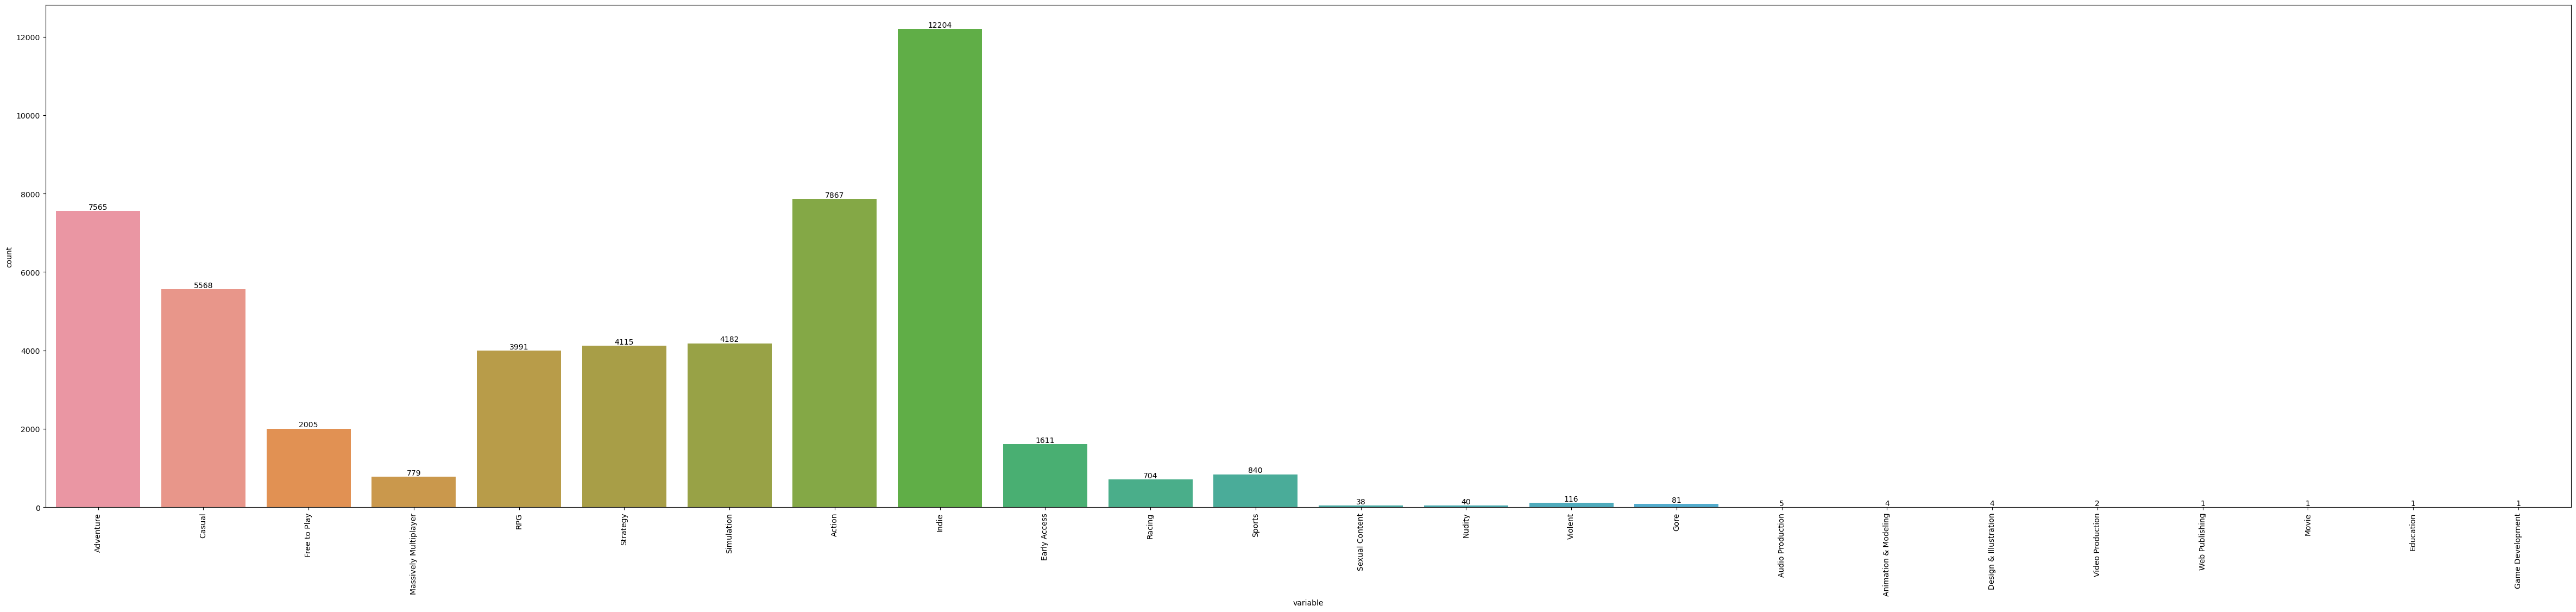

In [27]:
gen_table = gen_price_table.drop(columns =['Price', 'AppID', "Name"])

gen2 = gen_table.melt(value_vars=gen_table.columns)
gen2 = gen2[gen2["value"] != False]
f = plt.figure(figsize=(60, 12))

graph = sb.countplot(data=gen2, x="variable")
graph.bar_label(graph.containers[0])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

plt.show()


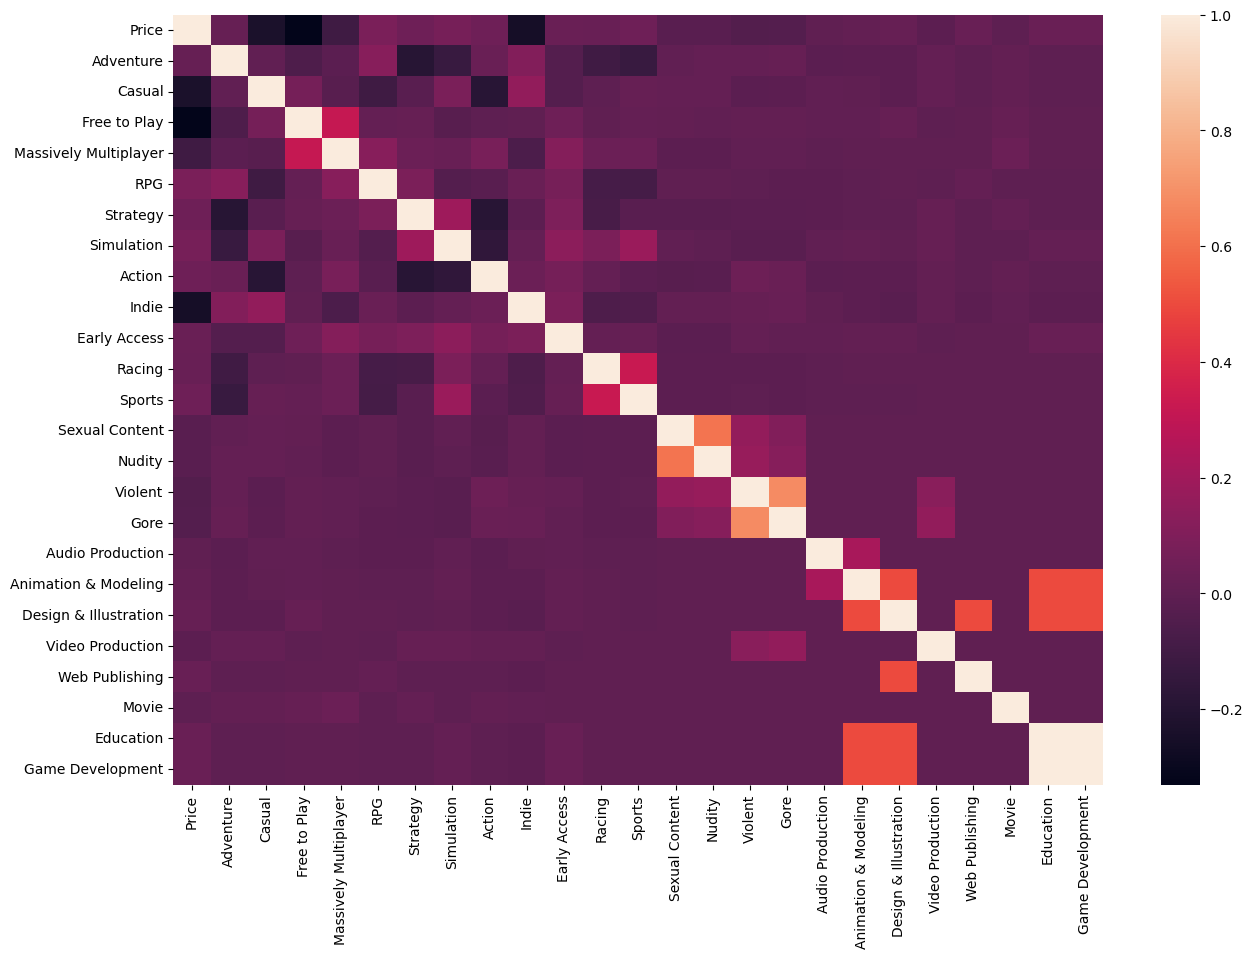

In [28]:
gen_price = gen_price_table.drop(columns =['AppID'])

plt.figure(figsize=(15,10))
sb.heatmap(data=gen_price.corr())
plt.show()

In [29]:
corr_table = gen_price.corr()["Price"]
corr_table.head()

Price                    1.000000
Adventure                0.020953
Casual                  -0.233984
Free to Play            -0.330740
Massively Multiplayer   -0.111383
Name: Price, dtype: float64

In [30]:
for index, row in corr_table.items():
    if(row > 0.1 or row < -0.1):
        print(index, " aa ", row)

Price  aa  1.0
Casual  aa  -0.23398377513663096
Free to Play  aa  -0.33074031736999976
Massively Multiplayer  aa  -0.11138270369383566
Indie  aa  -0.25285068220089757


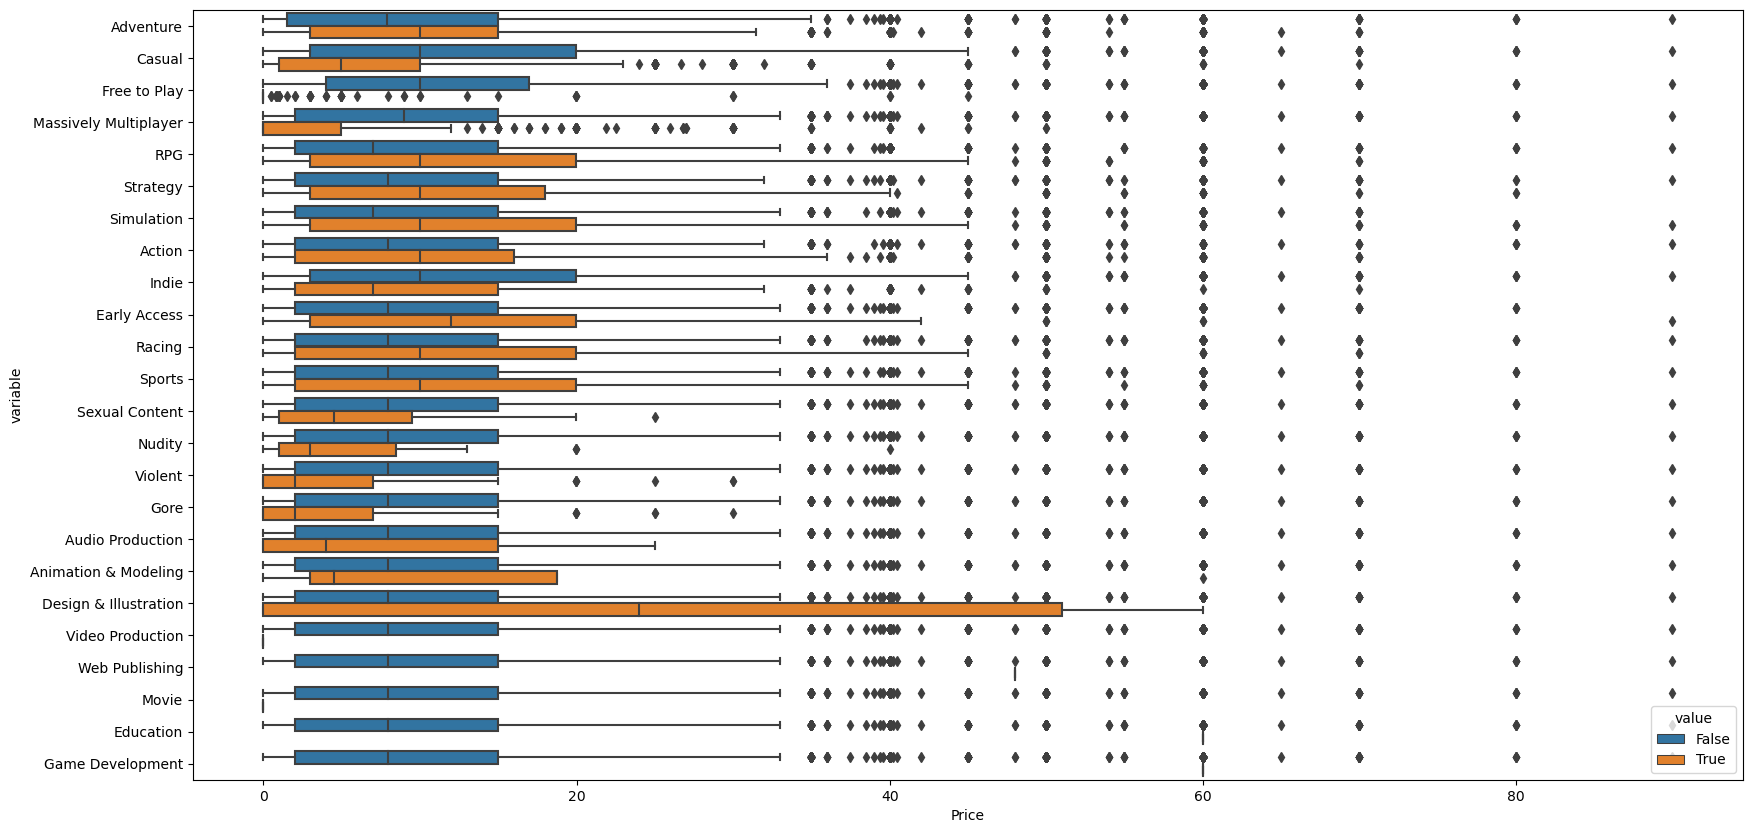

In [31]:
gen_table = gen_price_table.drop(columns =["Price", 'AppID', "Name"])
gen_table_melted = pd.melt(gen_price_table, id_vars=['Price'], value_vars=gen_table.columns)

plt.figure(figsize=(20,10))
sb.boxplot(x=gen_table_melted["Price"], y=gen_table_melted["variable"], hue=gen_table_melted["value"], orient="h")
plt.show()